In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

data = pd.read_csv('stroke_prediction.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [264]:
#data.value_counts()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

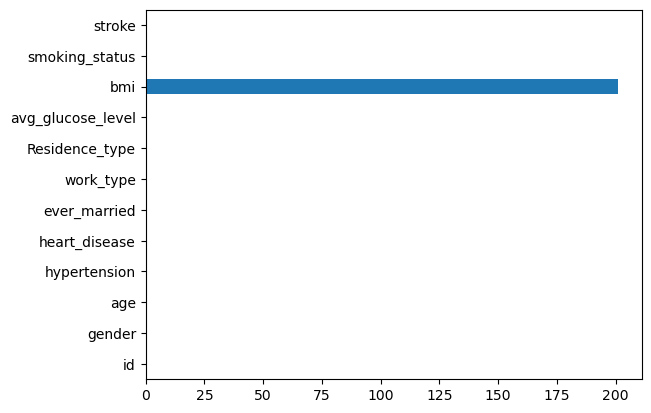

In [265]:
# Printing the number of N/A values in eacg column
print(data.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
data.isna().sum().plot.barh()

* Found 201 NULL values in bmi column

In [267]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [268]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## PRE PROCESSING + EDA

In [270]:
# The 'id' column is dropped since the attribute holds no significant importance to the problem at hand
datav1 = data.drop(['id'],axis=1)

### Gender Analysis

In [272]:
# Checking the values in the gender column
datav1['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

* We have a 'Other' gender and since there is only 1 instance we will remove it as to reduce the dimension of age

<Axes: title={'center': 'Gender Count Distribution'}>

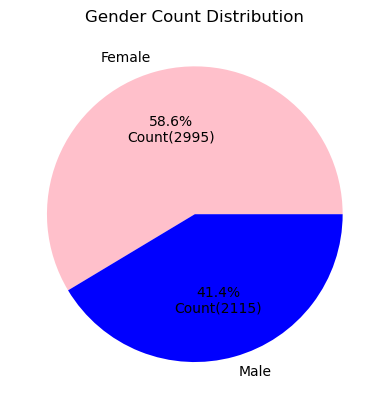

In [274]:
# Removing the 'other' gender instance inorder to reduce the dimension 
datav1['gender'] = data['gender'].replace('Other','Female')
# Plotting a pie chart to see the gender count distribution
datav1['gender'].value_counts().plot(
    kind="pie", 
    title="Gender Count Distribution", 
    autopct=lambda p: f'{p:.1f}%\nCount({int(p/100*datav1["gender"].value_counts().sum())})',
    ylabel="",  # Optional: Removes the default y-label
    colors=["pink", "blue"]
)

* There are more female as compared to males

## Target Feature - Stroke

* Stroke Feature - Stroke

In [278]:
#Value count in the stroke attribute
datav1['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

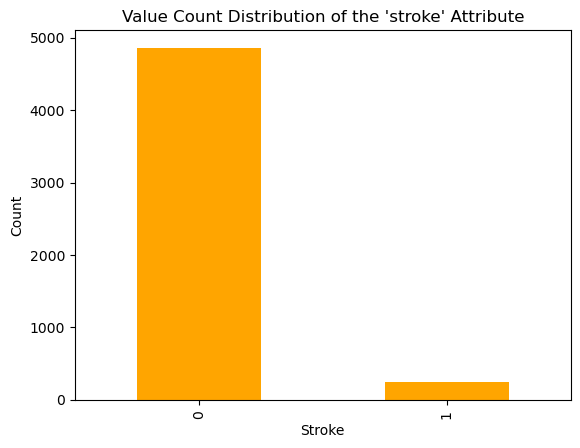

In [279]:
# Graphical representation of the value count distribution of the target attribute
datav1['stroke'].value_counts().plot(
    kind="bar", 
    color="orange", 
    title="Value Count Distribution of the 'stroke' Attribute"
)

# Add labels and title for clarity
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title("Value Count Distribution of the 'stroke' Attribute")

# Show the plot
plt.show()

In [280]:
print(f"Percentage of People who actuely got Stroke: {(datav1['stroke'].value_counts()[1]/datav1['stroke'].value_counts().sum()).round(3)*100}% ")

Percentage of People who actuely got Stroke: 4.9% 


* Our dataset is hightly skewed since only around 5% of the instances got stroke
* We will be needing yo perform necessary transformations to improve samples of minority class 

## Hyper-Tension Analysis 

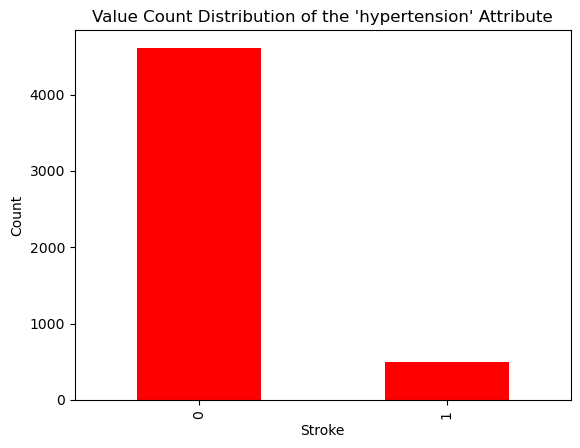

In [283]:
# Graphical representation of the value counts of the hypertension attribute
datav1['hypertension'].value_counts().plot(
    kind="bar", 
    color="red", 
    title="Value Count Distribution of the 'stroke' Attribute"
)

# Add labels and title for clarity
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title("Value Count Distribution of the 'hypertension' Attribute")

# Show the plot
plt.show()

### Work Type Analysis

In [285]:
# Value of count of work-type attribute
datav1['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: title={'center': 'Work Type Count Distribution'}>

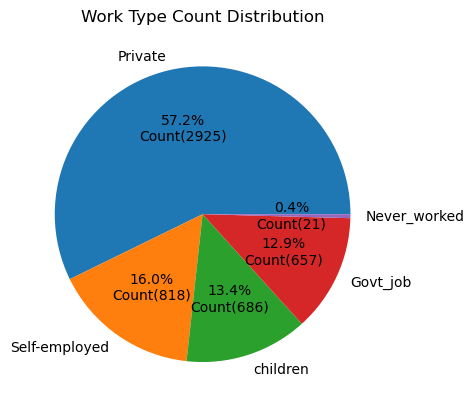

In [286]:
datav1['work_type'].value_counts().plot(
    kind="pie", 
    title="Work Type Count Distribution", 
    autopct=lambda p: f'{p:.1f}%\nCount({int(p/100*datav1["gender"].value_counts().sum())})',
    ylabel="",  # Optional: Removes the default y-label
)

### Smoking Status Analysis

In [288]:
#Value of count of smoking statuts attribute
datav1['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: title={'center': 'Smoking Status Count Distribution'}>

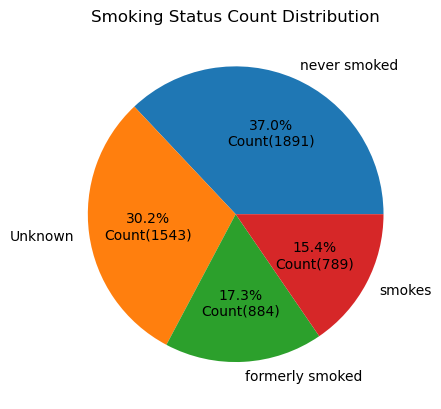

In [289]:
#Graphical representation of thea value counts of the smoking status attribute
datav1['smoking_status'].value_counts().plot(
    kind="pie", 
    title="Smoking Status Count Distribution", 
    autopct=lambda p: f'{p:.1f}%\nCount({int(p/100*datav1["gender"].value_counts().sum())})',
    ylabel="",  # Optional: Removes the default y-label
)

### Residence Type Analysis

In [291]:
# Value of count of residence attribute
datav1['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: title={'center': 'Residence Type Count Distribution'}>

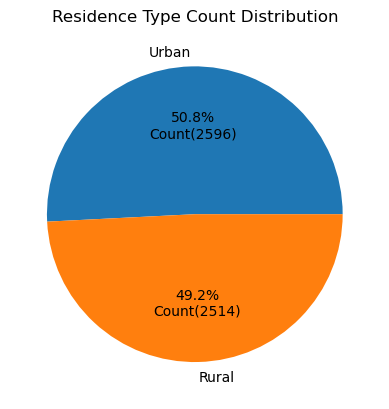

In [292]:
# Graphic representation  of the value  counts of the residence attribute 
datav1['Residence_type'].value_counts().plot(
    kind="pie", 
    title="Residence Type Count Distribution", 
    autopct=lambda p: f'{p:.1f}%\nCount({int(p/100*datav1["gender"].value_counts().sum())})',
    ylabel="",  # Optional: Removes the default y-label
)

* We have an equal percentage of population who are from Urban and rural areas

### BMI Analysis

In [295]:
# Number of BMI - NULL values
datav1['bmi'].isnull().sum()

201

* We only have N/A values in **bmi** column - **201 Null** values

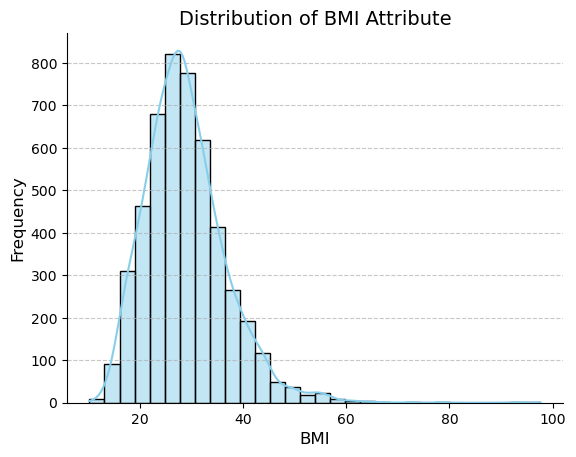

In [297]:
# Graphical representation of bmi attribute
sns.histplot(
    data=datav1['bmi'], 
    kde=True,  # Add a kernel density estimation curve
    bins=30,   # Set the number of bins for better granularity
    color="skyblue"  # Customize the bar color
)

# Add title and labels
plt.title("Distribution of BMI Attribute", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Customize the grid and style
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()  # Remove top and right spines for a cleaner look

# Display the plot
plt.show()

* Bmi is rightly **skewed**

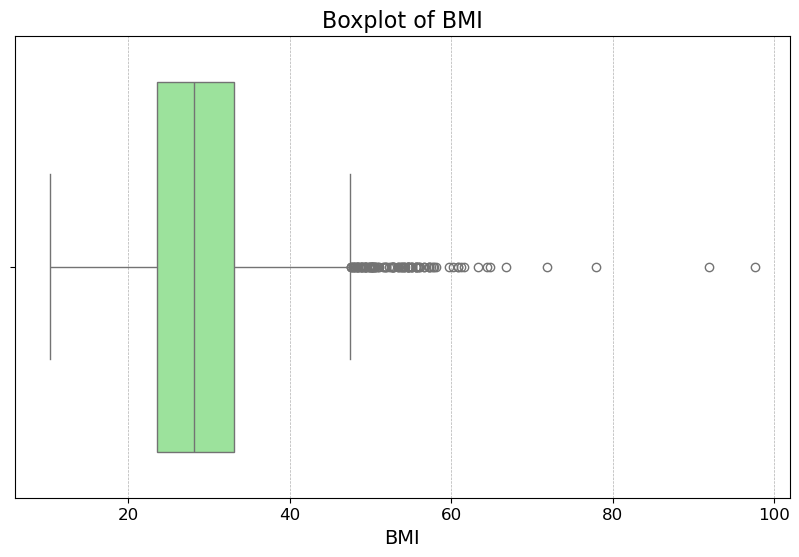

In [299]:
# Plotting the boxplot for 'bmi'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=datav1, x='bmi', color='lightgreen')

# Customizing the plot
plt.title('Boxplot of BMI', fontsize=16)  # Add a title
plt.xlabel('BMI', fontsize=14)  # Label for the x-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')  # Optional grid
plt.xticks(fontsize=12)  # Customize tick size for the x-axis


plt.show()

* Based on the histogram and boxplot we see that there are many outliers in bmi 

In [301]:
Q1 = datav1['bmi'].quantile(0.25)
Q3 = datav1['bmi'].quantile(0.75)

IQR = Q3 - Q1
outliers=np.where((datav1['bmi'] < (Q1 - 1.5 * IQR)) | (datav1['bmi'] > (Q3 +  1.5 * IQR)))[0]
datav1['bmi']=datav1['bmi'].drop(outliers)


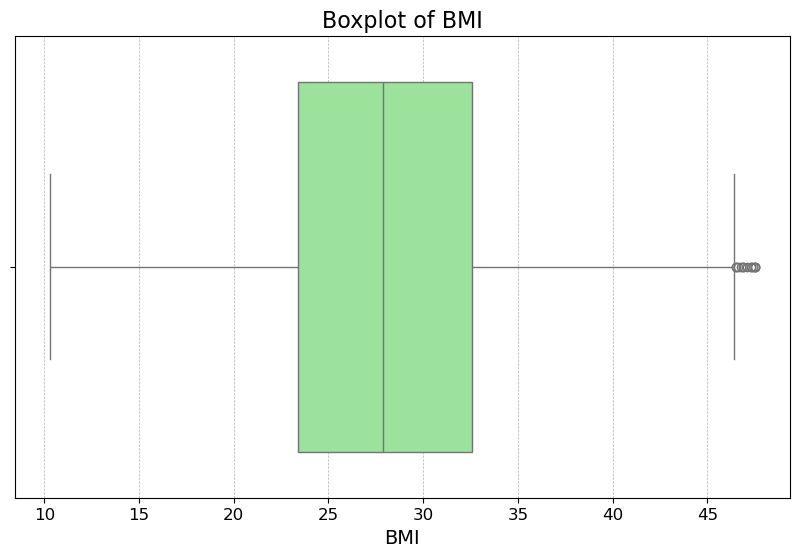

In [302]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=datav1, x='bmi', color='lightgreen')

# Customizing the plot
plt.title('Boxplot of BMI', fontsize=16)  # Add a title
plt.xlabel('BMI', fontsize=14)  # Label for the x-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')  # Optional grid
plt.xticks(fontsize=12)  # Customize tick size for the x-axis


plt.show()

* Total outliers in **bmi**:  110
* Total non-outliers in **bmi**: 5000

In [304]:
datav1_na = datav1.loc[datav1['bmi'].isnull()]
g = datav1_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h = datav1['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print(f"Percentage of people with stroke in Nan value to the overall dataset: {g/h*100} %")


People who got stroke and their BMI is NA: 42
People who got stroke and their BMI is given: 249
Percentage of people with stroke in Nan value to the overall dataset: 16.867469879518072 %


In [305]:
# Percentage of instances who got stroke
print(f"{(datav1['stroke'].sum()/len(datav1)*100).round(3)} %")

4.873 %


* Our Main target function is stroke And the instances who got a stroke is the minority - **249** Which is only **4.9 %** of the instances

In [307]:
# Analysing whether to drop NA value in BMI column
datav1_na = datav1.loc[datav1['bmi'].isnull()]
print(f"Nan BMI value whwre people have stroke: {datav1_na['stroke'].sum()}")
print(f"Overall BMI values where people have stroke: {datav1['stroke'].sum()}")

Nan BMI value whwre people have stroke: 42
Overall BMI values where people have stroke: 249


* Among the **201 BMI NULL values**, **40** of them correspond to cases with a stroke    
* Thus, we cannot drop the NULL values
* Since outliers are present, we cannot use mean imputation, as the mean is affected by outliers    
* Therefore, we will impute the missing values using the median

In [309]:
# Imputing the missing N/A values using the median of bmi column
print(f"Median of bmi: {datav1['bmi'].median()}")
datav1['bmi'] = datav1['bmi'].fillna(datav1['bmi'].median())

Median of bmi: 27.9


### AGE Analysis

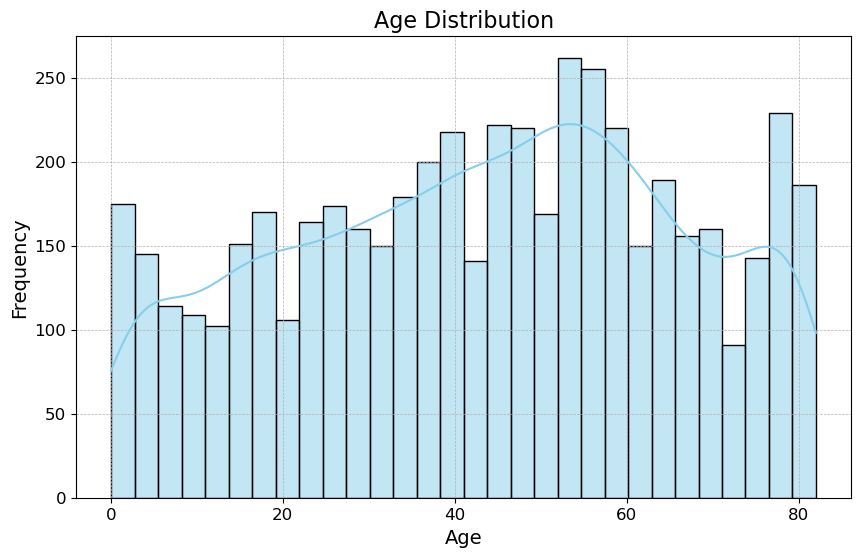

In [311]:
# Plotting the histogram for the 'age' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=datav1, x='age', kde=True, bins=30, color='skyblue')

# Customizing the plot
plt.title('Age Distribution', fontsize=16)  # Add a title
plt.xlabel('Age', fontsize=14)  # Label for the x-axis
plt.ylabel('Frequency', fontsize=14)  # Label for the y-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Optional grid
plt.xticks(fontsize=12)  # Customize tick size for the x-axis
plt.yticks(fontsize=12)  # Customize tick size for the y-axis

# Show the plot
plt.show()


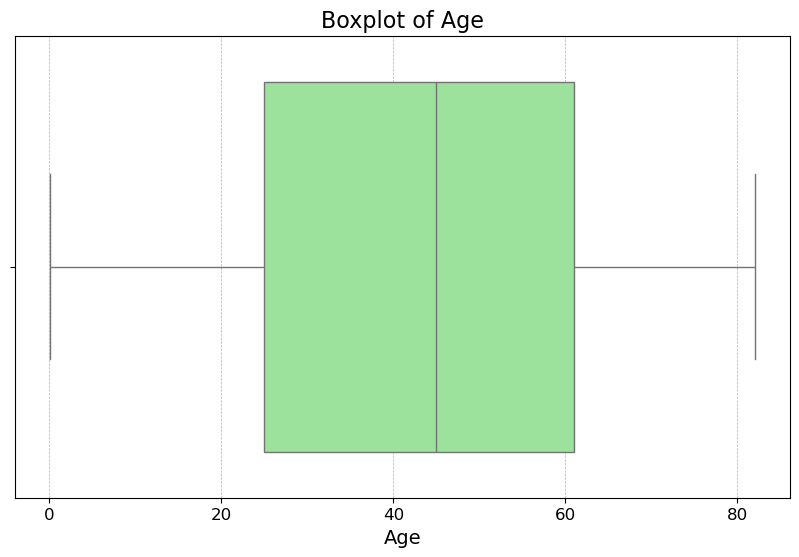

In [312]:
# Plotting the boxplot for 'age'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=datav1, x='age', color='lightgreen')

# Customizing the plot
plt.title('Boxplot of Age', fontsize=16)  # Add a title
plt.xlabel('Age', fontsize=14)  # Label for the x-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')  # Optional grid
plt.xticks(fontsize=12)  # Customize tick size for the x-axis

plt.show()

* The Age parameter values does not have any outliers
* And has a normal distribution

### AVERAGE GLUCOSE LEVEL ANALYSIS

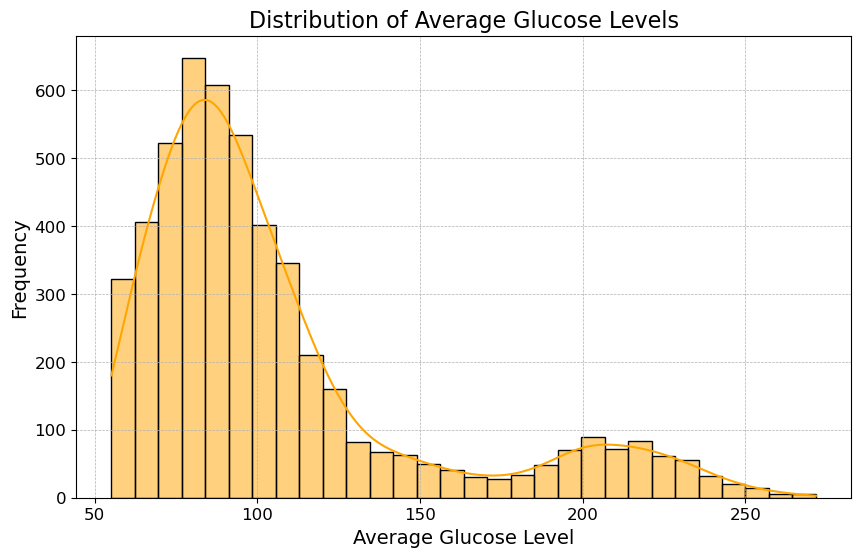

In [315]:
# Plotting the histogram for the 'avg_glucose_level' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=datav1, x='avg_glucose_level', kde=True, bins=30, color='orange')

# Customizing the plot
plt.title('Distribution of Average Glucose Levels', fontsize=16)  # Add a title
plt.xlabel('Average Glucose Level', fontsize=14)  # Label for the x-axis
plt.ylabel('Frequency', fontsize=14)  # Label for the y-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Optional grid
plt.xticks(fontsize=12)  # Customize tick size for the x-axis
plt.yticks(fontsize=12)  # Customize tick size for the y-axis

plt.show()

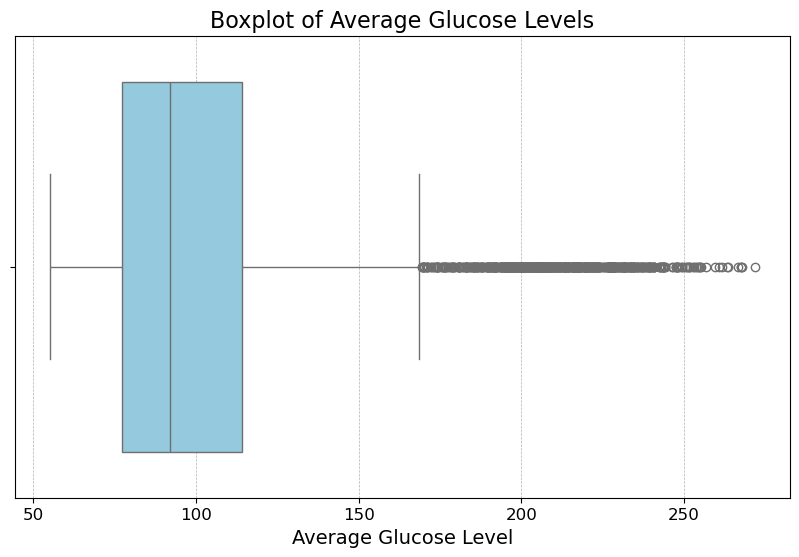

In [316]:
# Plotting the boxplot for 'avg_glucose_level'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=datav1, x='avg_glucose_level', color='skyblue')

# Customizing the plot
plt.title('Boxplot of Average Glucose Levels', fontsize=16)  # Add a title
plt.xlabel('Average Glucose Level', fontsize=14)  # Label for the x-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')  # Optional grid
plt.xticks(fontsize=12)  

plt.show()

* The age parameter values does not have any outliers
* And has a normal distribution

### AVERAGE GLUCOSE LEVEL ANALYSIS

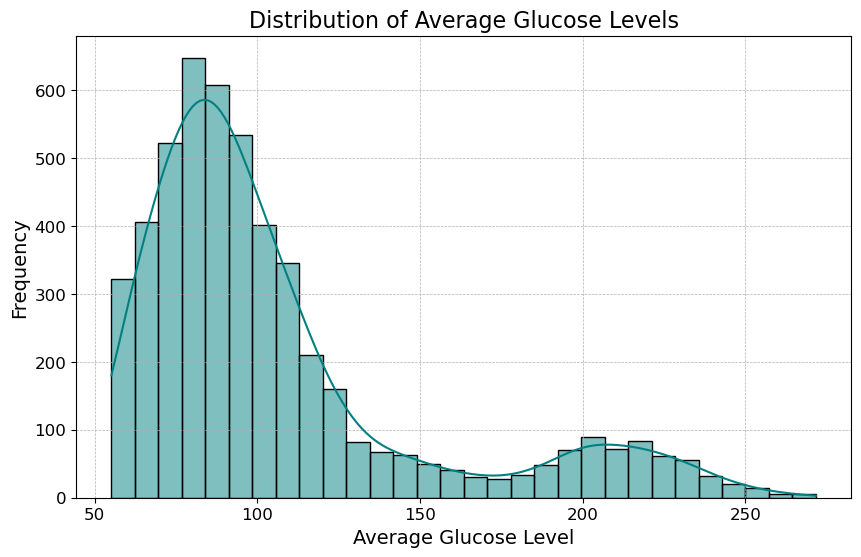

In [319]:
# Plotting the histogram for 'avg_glucose_level'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=datav1, x='avg_glucose_level', kde=True, bins=30, color='teal')

# Customizing the plot
plt.title('Distribution of Average Glucose Levels', fontsize=16)  # Add a title
plt.xlabel('Average Glucose Level', fontsize=14)  # Label for the x-axis
plt.ylabel('Frequency', fontsize=14)  # Label for the y-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Optional grid
plt.xticks(fontsize=12)  # Customize tick size for the x-axis
plt.yticks(fontsize=12)  # Customize tick size for the y-axis

plt.show()

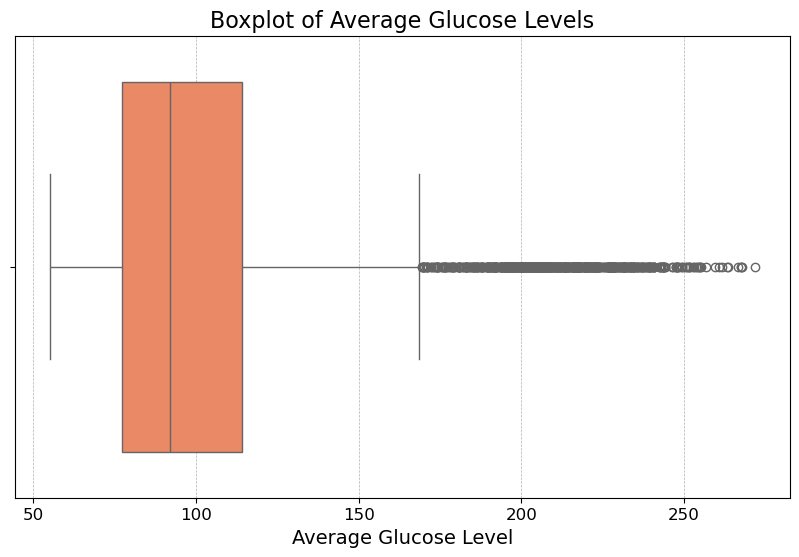

In [320]:
# Plotting the boxplot for 'avg_glucose_level'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=datav1, x='avg_glucose_level', color='coral')

# Customizing the plot
plt.title('Boxplot of Average Glucose Levels', fontsize=16)  # Add a title
plt.xlabel('Average Glucose Level', fontsize=14)  # Label for the x-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')  # Optional grid
plt.xticks(fontsize=12)  # Customize tick size for the x-axis

plt.show()

In [321]:
# Finding the count of outliers based on those instances which are out of iqr 
Q1 = datav1['avg_glucose_level'].quantile(0.25)
Q3 = datav1['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

# Identification des valeurs aberrantes
da = (datav1['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (datav1['avg_glucose_level'] > (Q3 + 1.5 * IQR))

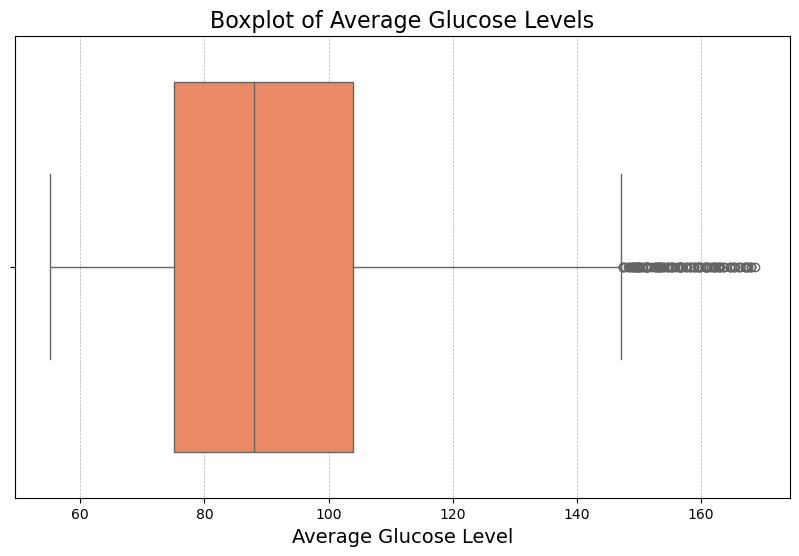

In [322]:
outliers_indices = np.where(da)[0]  # Trouver les indices des outliers
datav1 = datav1.drop(datav1.index[outliers_indices])


# Visualisation
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=datav1, x='avg_glucose_level', color='coral')

# Customizing the plot
plt.title('Boxplot of Average Glucose Levels', fontsize=16)  # Add a title
plt.xlabel('Average Glucose Level', fontsize=14)  # Label for the x-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')  # Optional grid
plt.xticks(fontsize=10)  

plt.show()

* Total outliers in avg_glucose_level : 627
* Total non-outliers in avg_glucose_level : 4483

### heart_disease Analysis 

In [325]:
# Value count of heart disease attribute
datav1['heart_disease'].value_counts()

heart_disease
0    4310
1     173
Name: count, dtype: int64

* This data reflects that around **94.5 %** of the total population or list of people are free from Heart_disease and only **6.5 %** are having **heart_disease**

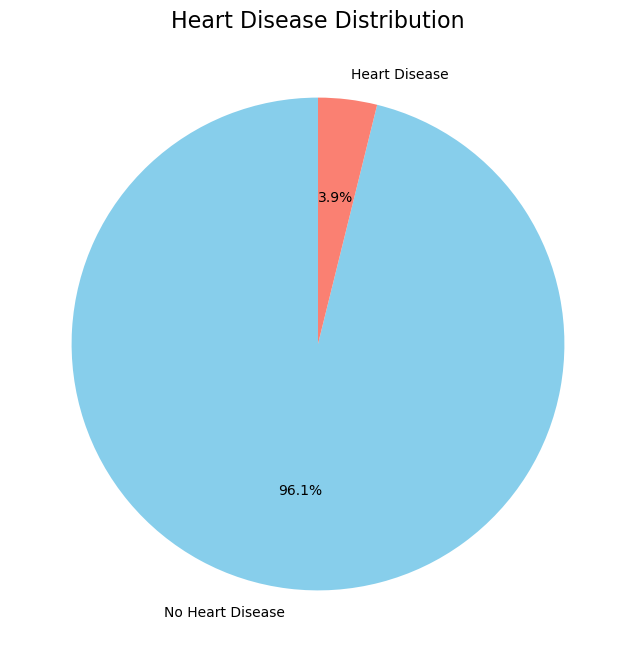

In [327]:
# Plotting the pie chart for 'heart_disease'
datav1['heart_disease'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages
    colors=['skyblue', 'salmon'],  # Customize colors
    startangle=90,  # Start the pie chart at 90 degrees
    figsize=(8, 8),  # Set the figure size
    labels=['No Heart Disease', 'Heart Disease']  # Add meaningful labels
)

# Customizing the plot
plt.title('Heart Disease Distribution', fontsize=16)
plt.ylabel('')  # Remove the default ylabel for cleaner visualization

plt.show()

### ever_married Analysis with Values

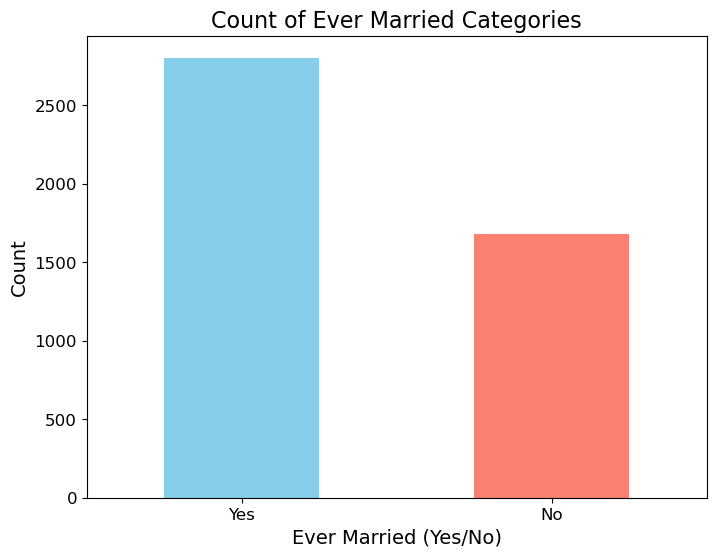

In [329]:
# Plotting a bar chart for 'ever_married'
datav1['ever_married'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'salmon'],
    figsize=(8, 6)
)

# Customizing the plot
plt.title('Count of Ever Married Categories', fontsize=16)
plt.xlabel('Ever Married (Yes/No)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Keep labels horizontal
plt.yticks(fontsize=12)

# Show the plot
plt.show()


* This result shows that **65.6 %** of people from the list are married and **34.4 %** are unmarried.

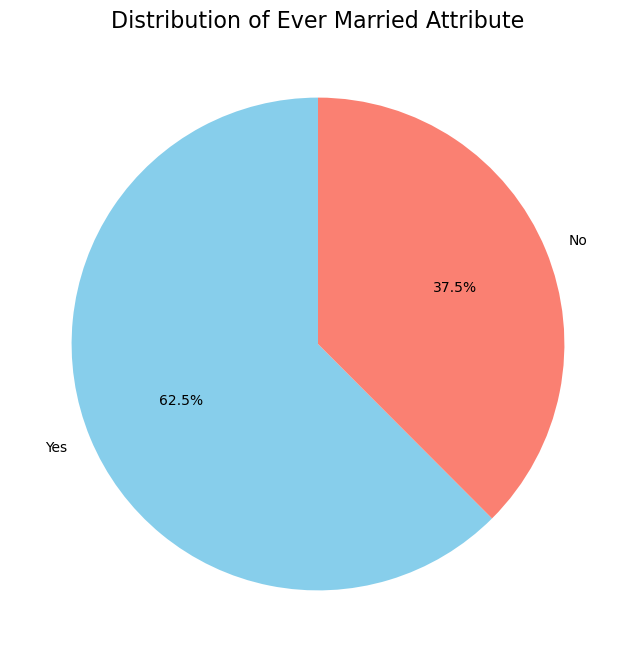

In [331]:
# Plotting the pie chart for 'ever_married'
datav1['ever_married'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages
    colors=['skyblue', 'salmon'],  # Custom colors for the slices
    startangle=90,  # Start the pie chart at 90 degrees
    figsize=(8, 8),  # Set the figure size
    labels=['Yes', 'No']  # Provide meaningful labels
)

# Customizing the plot
plt.title('Distribution of Ever Married Attribute', fontsize=16)
plt.ylabel('')  # Remove the default ylabel for a cleaner visualization

# Show the plot
plt.show()


## Cross Analysis - all the attribute compared with target attibute

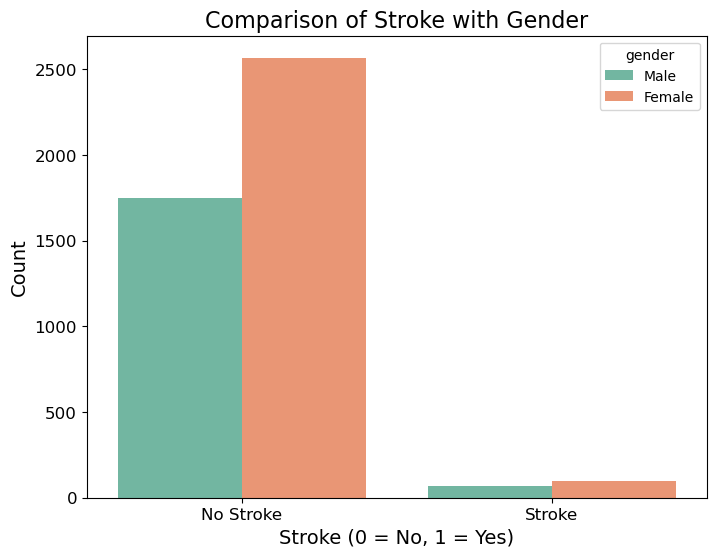

In [333]:
# Plotting the count plot for 'stroke' compared with 'gender'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(x='stroke', hue='gender', data=datav1, palette='Set2')

# Customizing the plot
plt.title('Comparison of Stroke with Gender', fontsize=16)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=14)  # Label for x-axis
plt.ylabel('Count', fontsize=14)  # Label for y-axis
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'], fontsize=12)  # Custom x-axis labels
plt.yticks(fontsize=12)  # Customize tick size for the y-axis


plt.show()

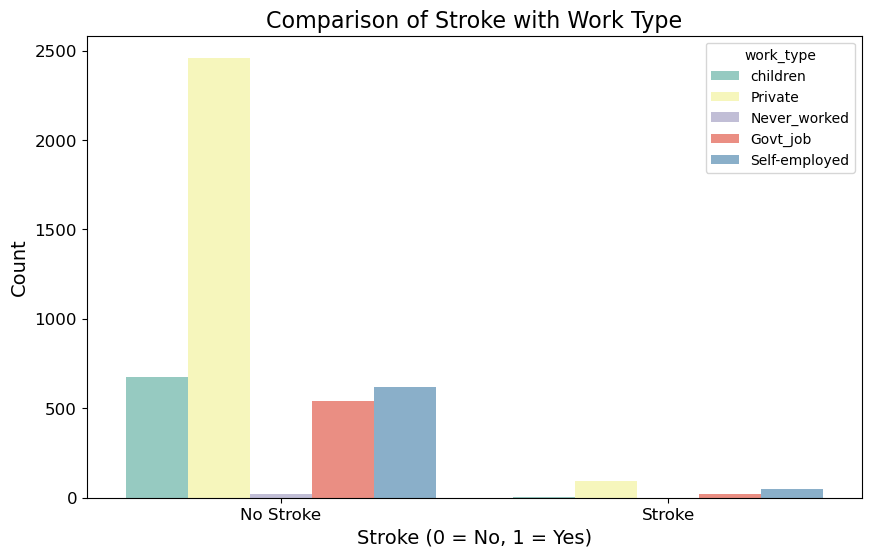

In [334]:
# Plotting the count plot for 'stroke' compared with 'work_type'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='stroke', hue='work_type', data=datav1, palette='Set3')

# Customizing the plot
plt.title('Comparison of Stroke with Work Type', fontsize=16)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=14)  # Label for x-axis
plt.ylabel('Count', fontsize=14)  # Label for y-axis
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'], fontsize=12)  # Custom x-axis labels
plt.yticks(fontsize=12)  # Customize tick size for the y-axis

plt.show()

* Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

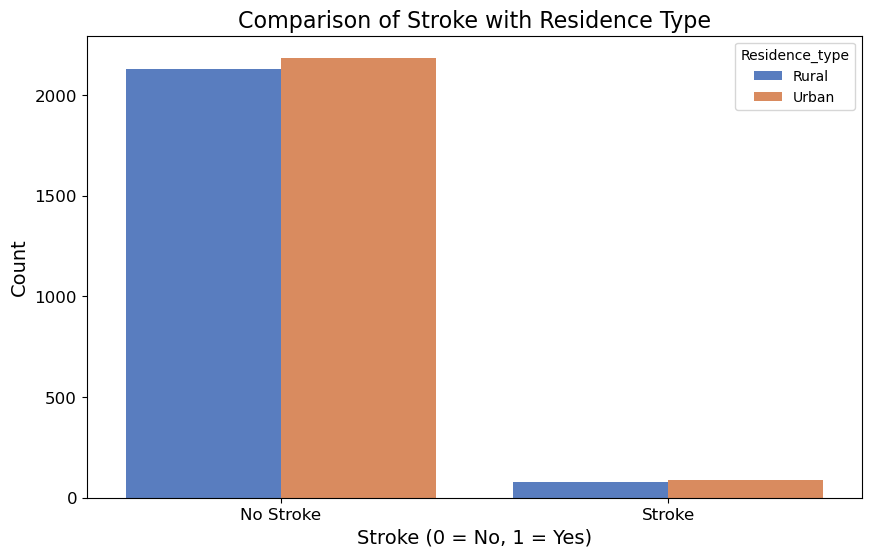

In [336]:
# Plotting the count plot for 'stroke' compared with 'Residence_type'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='stroke', hue='Residence_type', data=datav1, palette='muted')

# Customizing the plot
plt.title('Comparison of Stroke with Residence Type', fontsize=16)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=14)  # Label for x-axis
plt.ylabel('Count', fontsize=14)  # Label for y-axis
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'], fontsize=12)  # Custom x-axis labels
plt.yticks(fontsize=12)  # Customize tick size for the y-axis

plt.show()

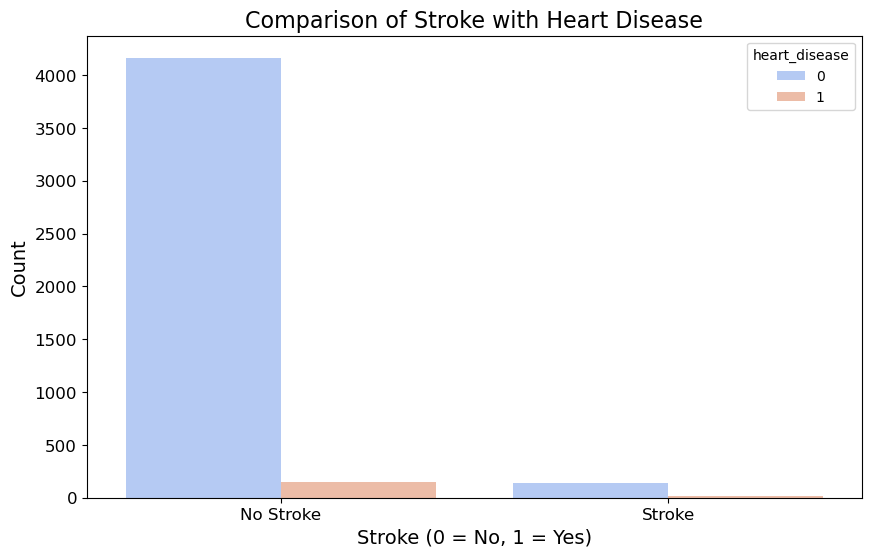

In [337]:
# Plotting the count plot for 'stroke' compared with 'heart_disease'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='stroke', hue='heart_disease', data=datav1, palette='coolwarm')

# Customizing the plot
plt.title('Comparison of Stroke with Heart Disease', fontsize=16)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=14)  # Label for x-axis
plt.ylabel('Count', fontsize=14)  # Label for y-axis
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'], fontsize=12)  # Custom x-axis labels
plt.yticks(fontsize=12)  # Customize tick size for the y-axis

plt.show()

* This plotting shows that the number of "people with Strokes but no heart disease" is approximately 6 to 8 times the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

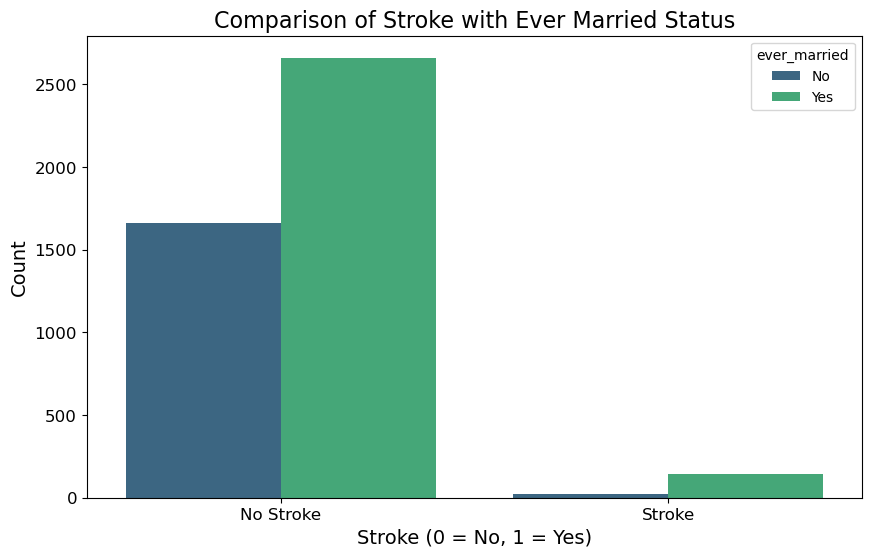

In [339]:
# Plotting the count plot for 'stroke' compared with 'ever_married'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='stroke', hue='ever_married', data=datav1, palette='viridis')

# Customizing the plot
plt.title('Comparison of Stroke with Ever Married Status', fontsize=16)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=14)  # Label for x-axis
plt.ylabel('Count', fontsize=14)  # Label for y-axis
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'], fontsize=12)  # Custom x-axis labels
plt.yticks(fontsize=12)  # Customize tick size for the y-axis

plt.show()

* This plotting shows that the number of "Married people with Strokes" is approximately 10 to 12 times the no. "Unmarried people with Strokes". 
* This shows most of the Married people got Strokes compared to Unmarried people.

### Creating Dummy Variables for Numeric-Binary Attributes

In [342]:
from sklearn.preprocessing import OrdinalEncoder
for col in ['gender','ever_married','work_type','Residence_type','smoking_status'] :
        categorie = [d for d in datav1[col].unique()]
        encoder = OrdinalEncoder(categories=[categorie])
        datav1[col] = encoder.fit_transform(datav1[[col]])


In [343]:
datav1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,0.0,80.0,0,1,0.0,0.0,0.0,105.92,32.5,0.0,1
6,0.0,74.0,1,1,0.0,0.0,0.0,70.09,27.4,0.0,1
7,1.0,69.0,0,0,1.0,0.0,1.0,94.39,22.8,0.0,1
8,1.0,59.0,0,0,0.0,0.0,0.0,76.15,27.9,1.0,1
9,1.0,78.0,0,0,0.0,0.0,1.0,58.57,24.2,1.0,1


In [344]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library 
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=datav1.drop(['stroke'],axis=1)
y=datav1['stroke']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

<Axes: >

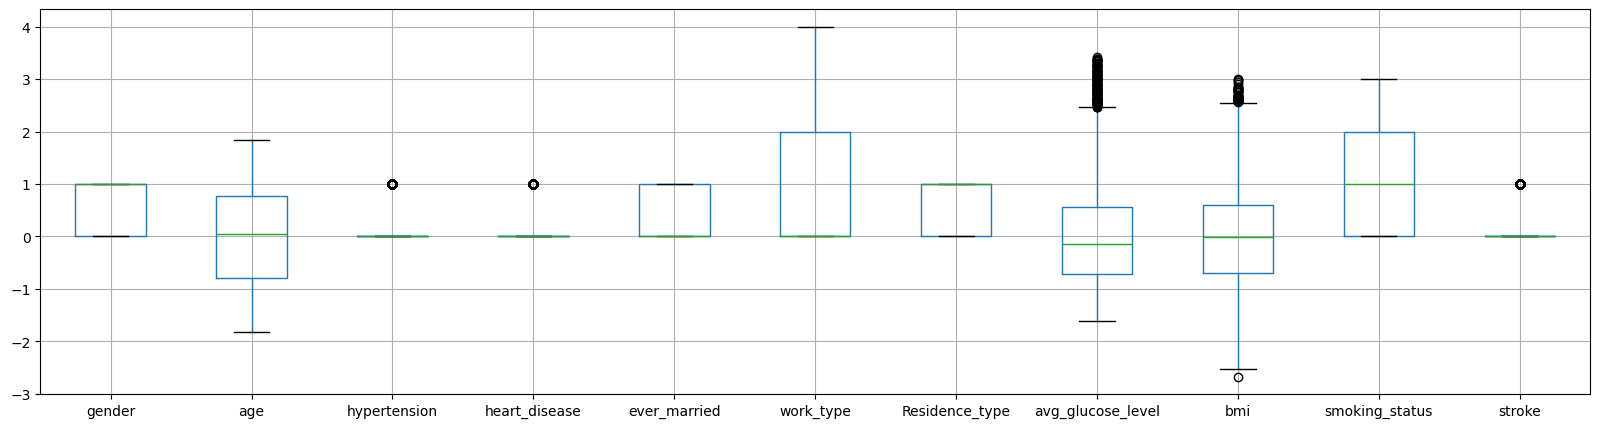

In [345]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
datav1[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(datav1[['bmi', 'avg_glucose_level', 'age']])
datav1.boxplot(figsize=(20,5))

* Scaling the numeric values for bringing them all to the same scale

### Creating Test-Train Split (80-20 Split)

In [348]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [349]:
# Checking the size of the splits 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (6908, 10)
y_train: (6908,)
X_test: (1728, 10)
y_test: (1728,)


## Training Model

### Pycaret Library

from pycaret import *
import pandas as pd

data_over = pd.concat([X_over, y_over], axis=1)
clf1 = setup(
    data=data_over,      # Dataset combiné
    target='stroke',     # Nom de la colonne cible
    train_size=0.7,      # Fraction pour l'entraînement
    session_id=123       # Graine aléatoire pour reproductibilité
)

from pycaret.classification import *
compare_models()

### XGBoost

In [356]:
# Importing required libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the classifier object
xgb = XGBClassifier()

# Training the classifier
xgb.fit(X_train, y_train)

# Predicting results using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))


Accuracy: 0.9820601851851852
ROC AUC Score: 0.9989937723755011


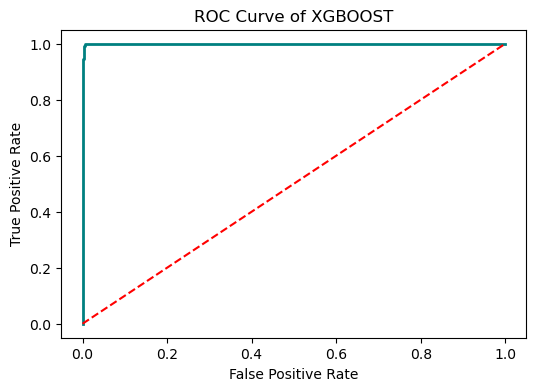

In [357]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


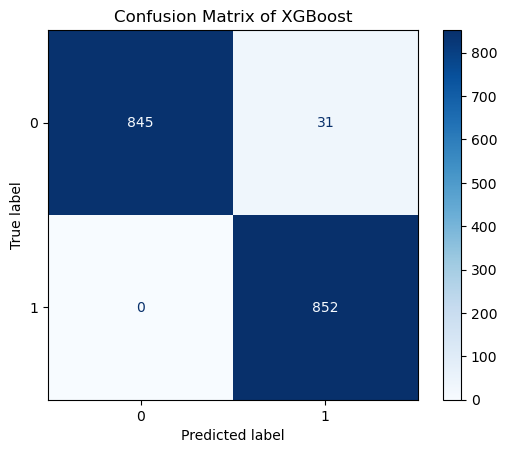

In [358]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix of XGBoost")
plt.show()


In [359]:
# Printing the precision,recall,f1score and support values of the model based on the confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Precision_score:",precision_score(y_test,y_pred_xgb))
print("Recall_score:",recall_score(y_test,y_pred_xgb))
print("f1_score:",f1_score(y_test,y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

Accuracy_score: 0.9820601851851852
Precision_score: 0.9648924122310306
Recall_score: 1.0
f1_score: 0.9821325648414986
ROC AUC Score: 0.9989937723755011


In [387]:
# Define the input features correctly based on the training dataset
input_features_dict = {
    'age': 75,
    'avg_glucose_level': 300,
    'bmi': 36.6,
    'gender': 'Male',
    'hypertension':1,
    'heart_disease': 1,
    'ever_married': 'Yes',
    'work_type': 'Private',
    'Residence_type': 'Urban',
    'smoking_status': 'formerly smoked'
}

# Create a DataFrame for input features
input_features_df = pd.DataFrame([input_features_dict])

# Ensure the same preprocessing steps are applied
input_features_df[['bmi', 'avg_glucose_level', 'age']] = s.transform(input_features_df[['bmi', 'avg_glucose_level', 'age']])

# Perform one-hot encoding to match the training data
input_features_encoded = pd.get_dummies(input_features_df)

# Align columns with training data
missing_cols = set(X.columns) - set(input_features_encoded.columns)
for col in missing_cols:
    input_features_encoded[col] = 0

input_features_encoded = input_features_encoded[X.columns]

# Make prediction
prediction = xgb.predict(input_features_encoded)[0]
print("Prediction:", prediction)


Prediction: 0
